In [74]:
#https://www.kaggle.com/datasets/mansoordaku/ckdisease

#Import & Read Data

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


libraries

In [76]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
sns.set()

%matplotlib inline

In [77]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/kidney_disease.csv')

#Explore Data

In [78]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


ความหมายของคอลัมน์

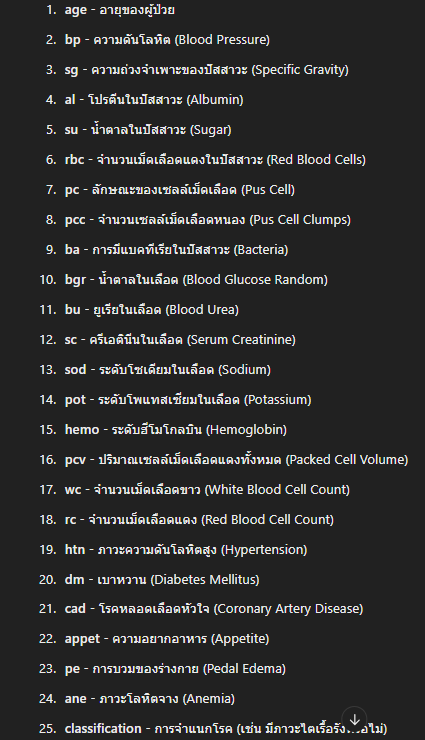

In [79]:
df.shape

(400, 26)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [81]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Check null value

In [82]:
df.isnull().sum().sort_values(ascending=False)

,0
rbc,152
rc,130
wc,105
pot,88
sod,87
pcv,70
pc,65
hemo,52
su,49
sg,47


rbc
rc
wc
pot
sod <br>
-there are missing val over 20% of 400 record

"ckd" (Chronic Kidney Disease - โรคไตเรื้อรัง) และ "notckd" (ไม่เป็นโรคไตเรื้อรัง)

In [83]:
#target column
df['classification'].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


#Preprocessing

In [84]:
#drop unnecessary columns
df.drop(columns=['id'], inplace=True)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [85]:
#categorical cols and numeric cols
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
numeric_cols = df.columns.difference(categorical_cols)

In [86]:
for col in df.columns :
  df[col] = df[col].replace('NaN',np.nan)

check unique val each volumn

In [87]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('------------')

rbc
normal      201
abnormal     47
Name: count, dtype: int64
------------
pc
normal      259
abnormal     76
Name: count, dtype: int64
------------
pcc
notpresent    354
present        42
Name: count, dtype: int64
------------
ba
notpresent    374
present        22
Name: count, dtype: int64
------------
htn
no     251
yes    147
Name: count, dtype: int64
------------
dm
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64
------------
cad
no      362
yes      34
\tno      2
Name: count, dtype: int64
------------
appet
good    317
poor     82
Name: count, dtype: int64
------------
pe
no     323
yes     76
Name: count, dtype: int64
------------
ane
no     339
yes     60
Name: count, dtype: int64
------------
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64
------------


In [88]:
#replace wrong value
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['cad'] = df['cad'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['pcc'] = df['pcc'].replace(to_replace={'notpresent':'not present'})
df['ba'] = df['ba'].replace(to_replace={'notpresent':'not present'})
df['classification'] = df['classification'].replace(to_replace={'ckd\t':'ckd','notckd':'not ckd'})

In [89]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('------------')

rbc
normal      201
abnormal     47
Name: count, dtype: int64
------------
pc
normal      259
abnormal     76
Name: count, dtype: int64
------------
pcc
not present    354
present         42
Name: count, dtype: int64
------------
ba
not present    374
present         22
Name: count, dtype: int64
------------
htn
no     251
yes    147
Name: count, dtype: int64
------------
dm
no     261
yes    137
Name: count, dtype: int64
------------
cad
no     364
yes     34
Name: count, dtype: int64
------------
appet
good    317
poor     82
Name: count, dtype: int64
------------
pe
no     323
yes     76
Name: count, dtype: int64
------------
ane
no     339
yes     60
Name: count, dtype: int64
------------
classification
ckd        250
not ckd    150
Name: count, dtype: int64
------------


In [90]:
mapping_val = {
    'no': 0, 'yes': 1,
    'normal': 0, 'abnormal': 1,
    'not present': 0, 'present': 1,
    'good':1 , 'poor':0,
    'ckd':1, 'not ckd':0
}

df.replace(mapping_val, inplace=True)

In [91]:
for col in categorical_cols:
  print(df[col].value_counts())
  print('------------')

rbc
0.0    201
1.0     47
Name: count, dtype: int64
------------
pc
0.0    259
1.0     76
Name: count, dtype: int64
------------
pcc
0.0    354
1.0     42
Name: count, dtype: int64
------------
ba
0.0    374
1.0     22
Name: count, dtype: int64
------------
htn
0.0    251
1.0    147
Name: count, dtype: int64
------------
dm
0.0    261
1.0    137
Name: count, dtype: int64
------------
cad
0.0    364
1.0     34
Name: count, dtype: int64
------------
appet
1.0    317
0.0     82
Name: count, dtype: int64
------------
pe
0.0    323
1.0     76
Name: count, dtype: int64
------------
ane
0.0    339
1.0     60
Name: count, dtype: int64
------------
classification
1    250
0    150
Name: count, dtype: int64
------------


In [92]:
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [93]:
#fill NaN in Categorical Cols
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#fill NaN in Numeric Cols
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col],errors='coerce')

from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = mean_imputer.fit_transform(df[numeric_cols])

In [94]:
df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


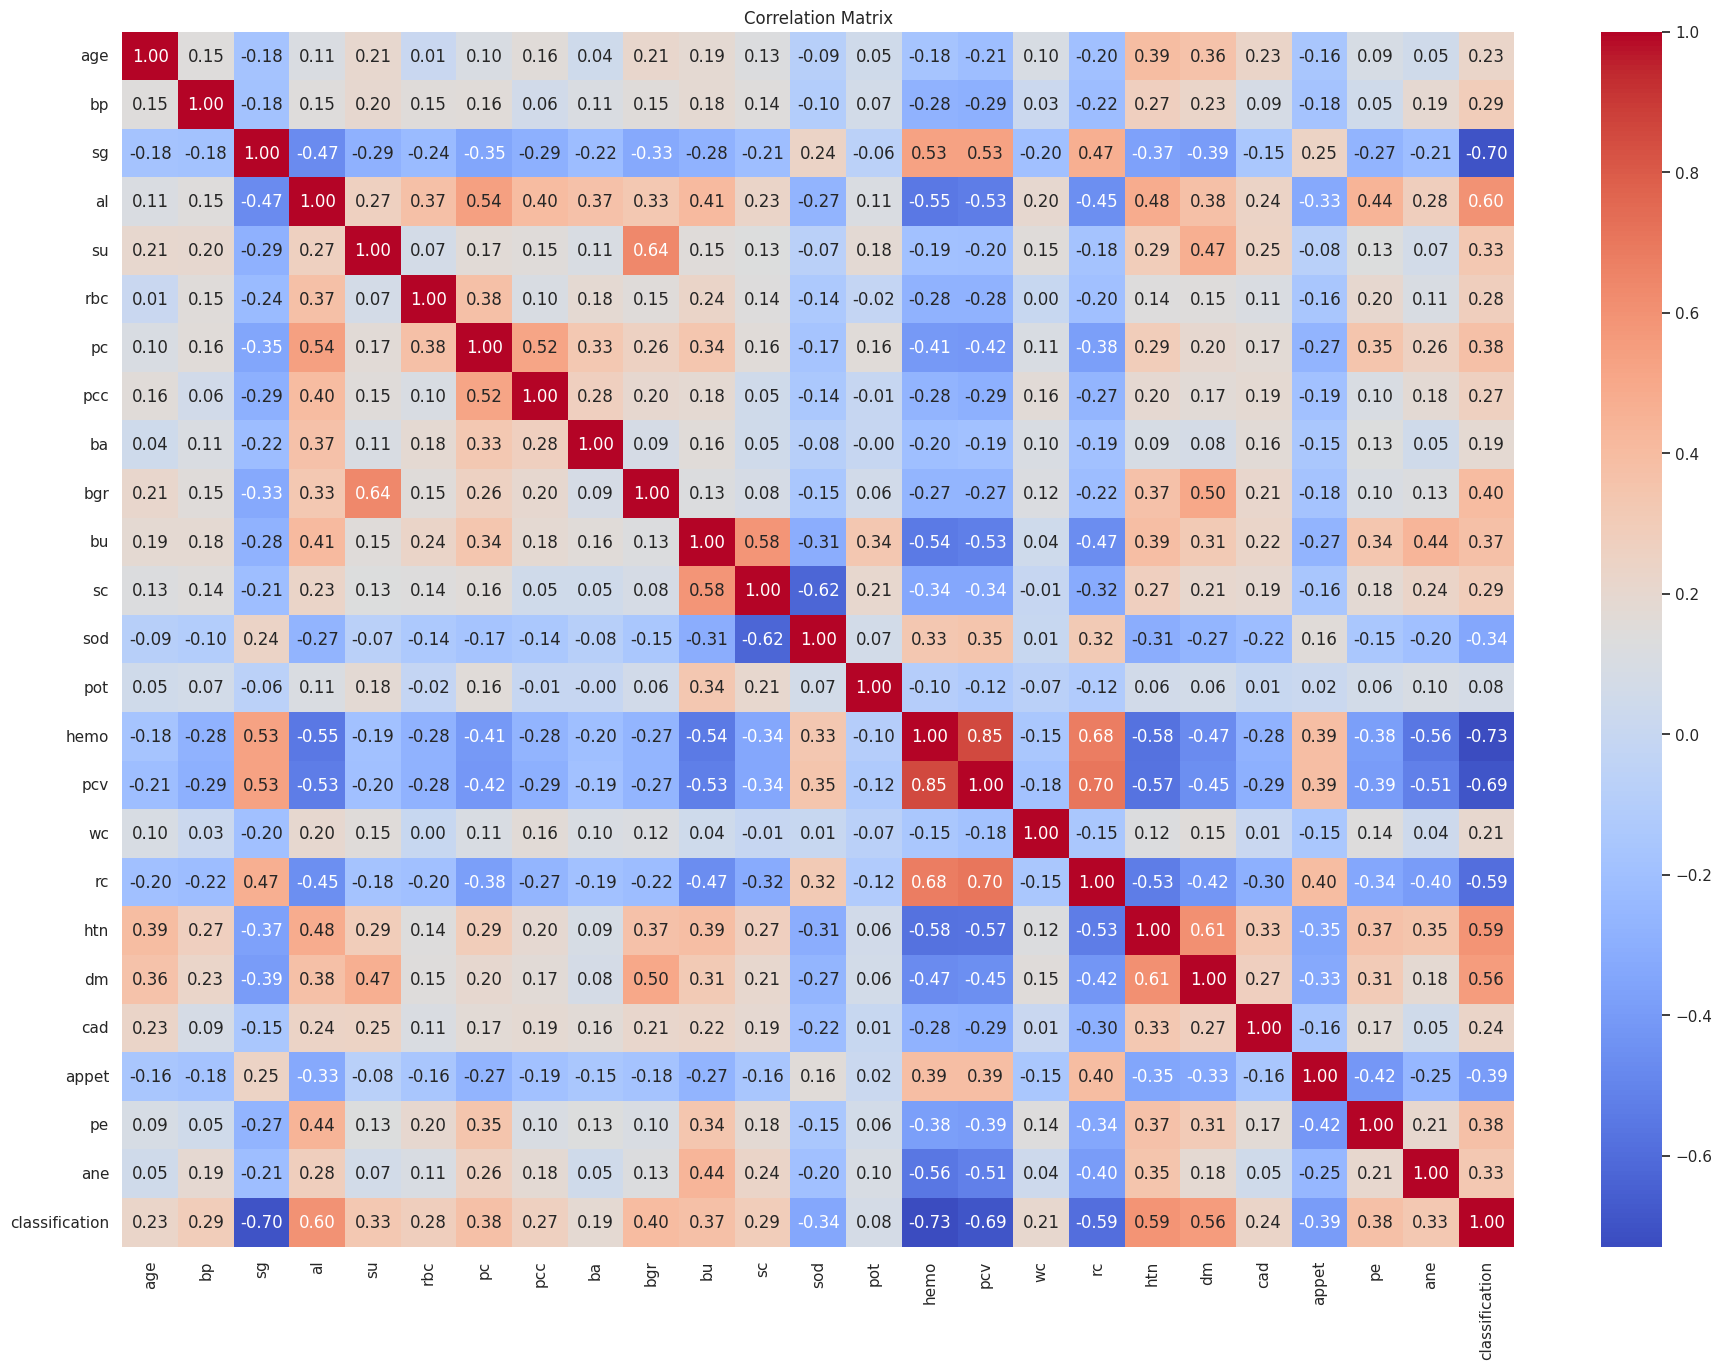

In [95]:
plt.figure(figsize=(20,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')

plt.show()

In [102]:
# Calculate the correlation between numerical columns and 'Classification'
correlation_with_classification = df.corr()['classification'].sort_values(ascending=False)

# Remove the correlation with itself (Classification with Classification)
correlation_with_classification = correlation_with_classification.drop('classification')

# Print the ordered list
correlation_with_classification


,classification
al,0.599238
htn,0.590438
dm,0.559060
bgr,0.401374
pc,0.375154
pe,0.375154
bu,0.372033
su,0.327812
ane,0.325396
sc,0.294079


In [96]:
lower0_2_corr_cols = ['appet','rc','pcv','hemo','pot','sod','sc','bgr','ba','sg']

#Modeling

In [60]:
from sklearn.model_selection import train_test_split

In [97]:
X = df.drop(columns=['classification','appet','rc','pcv','hemo','pot','sod','sc','bgr','ba','sg'])
# X = df.drop(df[lower0_2_corr_cols],axis=1)
y = df['classification']

In [101]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

##KNN

In [103]:
#KNN k-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f'KNN Training accuracy : {accuracy_score(y_train, knn.predict(X_train))}')
print(f'KNN Testing accuracy : {knn_acc}')

print(f'KNN Confusion Matrix : \n{confusion_matrix(y_test, knn.predict(X_test))}')

print(f'KNN classification_report : \n{classification_report(y_test, knn.predict(X_test))}')

KNN Training accuracy : 0.80625
KNN Testing accuracy : 0.7
KNN Confusion Matrix : 
[[22  6]
 [18 34]]
KNN classification_report : 
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        28
           1       0.85      0.65      0.74        52

    accuracy                           0.70        80
   macro avg       0.70      0.72      0.69        80
weighted avg       0.74      0.70      0.71        80



##random forest

In [104]:
# prompt: use random forest

from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f'Random Forest Training accuracy : {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Random Forest Testing accuracy : {rf_acc}')

print(f'Random Forest Confusion Matrix : \n{confusion_matrix(y_test, rf.predict(X_test))}')

print(f'Random Forest classification_report : \n{classification_report(y_test, rf.predict(X_test))}')


Random Forest Training accuracy : 1.0
Random Forest Testing accuracy : 0.9625
Random Forest Confusion Matrix : 
[[26  2]
 [ 1 51]]
Random Forest classification_report : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.96      0.98      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



##Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train , y_train)
dct_acc = accuracy_score(y_test, dct.predict(X_test))

print(f'Decision Tree Training accuracy : {accuracy_score(y_train, dct.predict(X_train))}')
print(f'Decision Tree Testing accuracy : {dct_acc}')

print(f'Decision Tree Confusion Matrix : \n{confusion_matrix(y_test, dct.predict(X_test))}')

print(f'Decision Tree classification_report : \n{classification_report(y_test, dct.predict(X_test))}')

Decision Tree Training accuracy : 1.0
Decision Tree Testing accuracy : 0.95
Decision Tree Confusion Matrix : 
[[25  3]
 [ 1 51]]
Decision Tree classification_report : 
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.94      0.98      0.96        52

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



##Grid Search

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit on data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.95


In [111]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26  2]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.96      0.98      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

